<a href="https://colab.research.google.com/github/iishipatel/customNER-forHomeAutomation/blob/main/prism_ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U spacy

     |████████████████████████████████| 12.8MB 335kB/s 
     |████████████████████████████████| 1.1MB 41.2MB/s 
     |████████████████████████████████| 460kB 41.5MB/s 
     |████████████████████████████████| 9.1MB 27.6MB/s 
     |████████████████████████████████| 122kB 50.2MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=f2e42e1c8800a320cb0d187ef7ed23e6e22c46089ec70388a5326f07aa129288
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: smart-open 4.2.0
    Uninstalling smart-open-4.2.0:
      Successfully uninstalled smart-open-4.2.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    U

In [ ]:
!python -m spacy download en

2021-03-17 06:05:54.422742: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.7MB 304kB/s 
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import json
import logging
import sys

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
path="/content/gdrive/MyDrive/Samsung-Prism/ner-dataset.csv"

In [ ]:
def tsv_to_json_format(input_path,output_path,unknown_label):
    try:
        f=open(input_path,'r') # input file
        fp=open(output_path, 'w') # output file
        data_dict={}
        annotations =[]
        label_dict={}
        s=''
        start=0
        for line in f:
            if line[0:len(line)-1]!='.	0':
                word,entity=line.split('\t')
                s+=word+" "
                entity=entity[:len(entity)-1]
                if entity!=unknown_label:
                    if len(entity) != 1:
                        d={}
                        d['text']=word
                        d['start']=start
                        d['end']=start+len(word)-1  
                        try:
                            label_dict[entity].append(d)
                        except:
                            label_dict[entity]=[]
                            label_dict[entity].append(d) 
                start+=len(word)+1
            else:
                data_dict['content']=s
                s=''
                label_list=[]
                for ents in list(label_dict.keys()):
                    for i in range(len(label_dict[ents])):
                        if(label_dict[ents][i]['text']!=''):
                            l=[ents,label_dict[ents][i]]
                            for j in range(i+1,len(label_dict[ents])): 
                                if(label_dict[ents][i]['text']==label_dict[ents][j]['text']):  
                                    di={}
                                    di['start']=label_dict[ents][j]['start']
                                    di['end']=label_dict[ents][j]['end']
                                    di['text']=label_dict[ents][i]['text']
                                    l.append(di)
                                    label_dict[ents][j]['text']=''
                            label_list.append(l)                         
                            
                for entities in label_list:
                    label={}
                    label['label']=[entities[0]]
                    label['points']=entities[1:]
                    annotations.append(label)
                data_dict['annotation']=annotations
                annotations=[]
                json.dump(data_dict, fp)
                fp.write('\n')
                data_dict={}
                start=0
                label_dict={}
    except Exception as e:
        logging.exception("Unable to process file" + "\n" + "error = " + str(e))
        return None

In [ ]:
tsv_to_json_format("/content/gdrive/MyDrive/Samsung-Prism/ner-dataset.tsv",'/content/gdrive/MyDrive/Samsung-Prism/ner_dataset.json','abc')

turn	B-action
on	B-state
AC	B-device
in	0
the	0
bedroom	B-room
.	0
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'on', 'start': 5, 'end': 6}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'on', 'start': 5, 'end': 6}], ['B-device', {'text': 'AC', 'start': 8, 'end': 9}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'on', 'start': 5, 'end': 6}], ['B-device', {'text': 'AC', 'start': 8, 'end': 9}], ['B-room', {'text': 'bedroom', 'start': 18, 'end': 24}]]
turn	B-action
off	B-state
UPS	B-device
in	0
the	0
livingroom	B-room
.	0
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'off', 'start': 5, 'end': 7}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'off', 'start': 5, 'end': 7}], ['B-device', {'text': 'UPS', 'start': 9, 'end': 11}]]
[['B

In [4]:
import plac
import logging
import argparse
import sys
import os
import json
import pickle

In [5]:
# def json2spacy(input_file=None, output_file=None):
#     try:
#         training_data = []
#         lines=[]
#         with open(input_file, 'r') as f:
#             lines = f.readlines()

#         for line in lines:
#             data = json.loads(line)
#             text = data['content']
#             entities = []
#             for annotation in data['annotation']:
#                 point = annotation['points'][0]
#                 labels = annotation['label']
#                 if not isinstance(labels, list):
#                     labels = [labels]

#                 for label in labels:
#                     entities.append((point['start'], point['end'] + 1 ,label))


#             training_data.append((text, {"entities" : entities}))

#         print(training_data)

#         with open(output_file, 'wb') as fp:
#             pickle.dump(training_data, fp)

#     except Exception as e:
#         logging.exception("Unable to process " + input_file + "\n" + "error = " + str(e))
#         return None
import re


def convert_dataturks_to_spacy(dataturks_JSON_FilePath):
    try:
        training_data = []
        lines=[]
        with open(dataturks_JSON_FilePath, 'r') as f:
            lines = f.readlines()

        for line in lines:
            data = json.loads(line)
            text = data['content']
            entities = []
            for annotation in data['annotation']:
                #only a single point in text annotation.
                point = annotation['points'][0]
                labels = annotation['label']
                # handle both list of labels or a single label.
                if not isinstance(labels, list):
                    labels = [labels]

                for label in labels:
                    #dataturks indices are both inclusive [start, end] but spacy is not [start, end)
                    entities.append((point['start'], point['end'] + 1 ,label))


            training_data.append((text, {"entities" : entities}))

        return training_data
    except Exception as e:
        logging.exception("Unable to process " + dataturks_JSON_FilePath + "\n" + "error = " + str(e))
        return None

In [33]:
with open ('/content/gdrive/MyDrive/Samsung-Prism/spacy-data', 'rb') as fp:
    TRAIN_DATA = pickle.load(fp)
print (TRAIN_DATA)

[('turn on AC in the bedroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 10, 'B-device'), (18, 25, 'B-room')]}), ('turn off UPS in the livingroom ', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 30, 'B-room')]}), ('turn on Light in the storeroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 13, 'B-device'), (21, 30, 'B-room')]}), ('turn on Fan in the bedroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 26, 'B-room')]}), ('turn off Refrigerator in the kitchen ', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 21, 'B-device'), (29, 36, 'B-room')]}), ('turn on Fan in the livingroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 29, 'B-room')]}), ('turn off Fan in the bedroom ', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 27, 'B-room')]}), ('turn on Light in the kitchen ', {'entities': [(0, 4, 'B-action'), (5, 7, 

In [11]:
def customNER(model=None, new_model_name='new_model', output_dir=None, n_iter=10):
    if model is not None:
        nlp = spacy.load(model)  # load existing spacy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank('en')  # create blank Language class
        print("Created blank 'en' model")
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner)
    else:
        ner = nlp.get_pipe('ner')

    for i in LABEL:
        ner.add_label(i)   # Add new entity labels to entity recognizer

    if model is None:
        optimizer = nlp.begin_training()
    else:
        optimizer = nlp.entity.create_optimizer()

    # Get names of other pipes to disable them during training to train only NER
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            losses = {}
            batches = minibatch(TRAIN_DATA, size=compounding(4., 32., 1.001))
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts, annotations, sgd=optimizer, drop=0.35,
                           losses=losses)
            print('Losses', losses) 

    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.meta['name'] = new_model_name  # rename model
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)
customNER(model=model, new_model_name=new_model,output_dir=output_dir,n_iter=10)

Created blank 'en' model


ValueError: ignored

In [13]:
!python -m spacy debug-data train_path /content/gdrive/MyDrive/Samsung-Prism/ner_dataset.json

usage: spacy debug-data [-h] [-tm None] [-b None] [-p tagger,parser,ner] [-IW]
                        [-V] [-NF]
                        lang train_path dev_path
spacy debug-data: error: the following arguments are required: dev_path


In [58]:
# Test the trained model
test_text = 'switch on the fan in diningroom'
doc = nlp(test_text)
print("Entities in '%s'" % test_text)
for ent in doc.ents:
    print(ent.label_, ent.text)

Entities in 'switch on the fan in diningroom'
B-action switch
B-state on
B-device fan
B-room diningroom


In [14]:
from __future__ import unicode_literals, print_function
import plac
import random
from pathlib import Path
import spacy
from tqdm import tqdm

In [45]:
TRAIN_DATA=[('turn on AC in the bedroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 10, 'B-device'), (18, 25, 'B-room')]}), ('turn off UPS in the livingroom ', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 30, 'B-room')]}), ('turn on Light in the storeroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 13, 'B-device'), (21, 30, 'B-room')]}), ('turn on Fan in the bedroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 26, 'B-room')]}), ('turn off Refrigerator in the kitchen ', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 21, 'B-device'), (29, 36, 'B-room')]}), ('turn on Fan in the livingroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 29, 'B-room')]}), ('turn off Fan in the bedroom ', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 27, 'B-room')]}), ('turn on Light in the kitchen ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 13, 'B-device'), (21, 28, 'B-room')]}), ('turn off Speaker in the bedroom ', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 16, 'B-device'), (24, 31, 'B-room')]}), ('turn on Microwave in the kitchen ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 17, 'B-device'), (25, 32, 'B-room')]}), ('turn on Computer in the studyroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 16, 'B-device'), (24, 33, 'B-room')]}), ('turn on Nightlamp in the bedroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 17, 'B-device'), (25, 32, 'B-room')]}), ('turn on Television in the livingroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 18, 'B-device'), (26, 36, 'B-room')]}), ('switch off the TV in guestroom', {'entities': [(0, 6, 'B-action'), (7, 10, 'B-state'), (15, 17, 'B-device'), (21, 30, 'B-room')]}), ('turn on Refrigerator in the kitchen ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 20, 'B-device'), (28, 35, 'B-room')]}), ('turn off Fan in the livingroom ', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 30, 'B-room')]}), ('turn on Fan in the bedroom ', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 26, 'B-room')]}), ('turn on Grinder in the kitchen decrease room temprature it feels like summer ', {'entities': [(0, 4, 'B-action'), (31, 39, 'B-action'), (5, 7, 'B-state'), (8, 15, 'B-device'), (23, 30, 'B-room'), (40, 55, 'B-attribute')]}), ('hey can you start the televison ', {'entities': [(12, 17, 'B-action'), (22, 31, 'B-device')]}), ('I am going to visit Durgapur in India ', {'entities': [(5, 10, 'B-action'), (14, 19, 'B-action'), (20, 28, 'B-geo'), (32, 37, 'B-geo')]}), ('reduce the noise its hurting my ears ', {'entities': [(0, 6, 'B-action'), (21, 28, 'B-action'), (11, 16, 'B-attribute')]}), ('heat the oven to 20 degrees ', {'entities': [(0, 4, 'B-action'), (9, 13, 'B-device'), (17, 27, 'B-state')]})]

In [47]:
model = None
output_dir=Path("/content/gdrive/MyDrive/Samsung-Prism/")
n_iter=30

In [48]:
#load the model

if model is not None:
    nlp = spacy.load(model)  
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.blank('en')  
    print("Created blank 'en' model")

#set up the pipeline

if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe('ner')

Created blank 'en' model


In [52]:
for _, annotations in newdata:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])
loss_log=[]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        random.shuffle(newdata)
        losses = {}
        for text, annotations in tqdm(newdata):
            nlp.update(
                [text],  
                [annotations],  
                drop=0.5,  
                sgd=optimizer,
                losses=losses)
        loss_log.append(losses['ner'])
        print(losses)

 18%|█▊        | 4/22 [00:00<00:00, 33.19it/s]

{'ner': 118.47571277618408}


 18%|█▊        | 4/22 [00:00<00:00, 34.77it/s]

{'ner': 98.61552137881517}


 18%|█▊        | 4/22 [00:00<00:00, 35.65it/s]

{'ner': 59.79117344709812}


 18%|█▊        | 4/22 [00:00<00:00, 35.12it/s]

{'ner': 31.25438546812264}


 18%|█▊        | 4/22 [00:00<00:00, 34.39it/s]

{'ner': 25.533101667669083}


 18%|█▊        | 4/22 [00:00<00:00, 35.30it/s]

{'ner': 25.389256302048405}


 18%|█▊        | 4/22 [00:00<00:00, 34.16it/s]

{'ner': 21.40328110460555}


 18%|█▊        | 4/22 [00:00<00:00, 35.39it/s]

{'ner': 16.966067170318592}


 18%|█▊        | 4/22 [00:00<00:00, 35.70it/s]

{'ner': 13.148183746850183}


 18%|█▊        | 4/22 [00:00<00:00, 36.04it/s]

{'ner': 13.434385842384703}


 18%|█▊        | 4/22 [00:00<00:00, 32.20it/s]

{'ner': 15.401829632952467}


 18%|█▊        | 4/22 [00:00<00:00, 35.59it/s]

{'ner': 12.684005520255221}


 18%|█▊        | 4/22 [00:00<00:00, 32.82it/s]

{'ner': 18.849032943297882}


 18%|█▊        | 4/22 [00:00<00:00, 34.40it/s]

{'ner': 13.440057719914572}


 18%|█▊        | 4/22 [00:00<00:00, 33.42it/s]

{'ner': 14.426969609826543}


 18%|█▊        | 4/22 [00:00<00:00, 33.65it/s]

{'ner': 9.765218176242431}


 18%|█▊        | 4/22 [00:00<00:00, 34.65it/s]

{'ner': 11.823531678022203}


 18%|█▊        | 4/22 [00:00<00:00, 34.83it/s]

{'ner': 10.055285386192155}


 18%|█▊        | 4/22 [00:00<00:00, 34.91it/s]

{'ner': 8.461815622529569}


 18%|█▊        | 4/22 [00:00<00:00, 35.22it/s]

{'ner': 8.639660078202107}


 18%|█▊        | 4/22 [00:00<00:00, 33.93it/s]

{'ner': 4.357842145818949}


 18%|█▊        | 4/22 [00:00<00:00, 36.12it/s]

{'ner': 9.608502952825352}


 18%|█▊        | 4/22 [00:00<00:00, 34.23it/s]

{'ner': 2.8345851064725305}


 18%|█▊        | 4/22 [00:00<00:00, 35.77it/s]

{'ner': 5.149971944408563}


 18%|█▊        | 4/22 [00:00<00:00, 34.49it/s]

{'ner': 7.892801689509535}


 18%|█▊        | 4/22 [00:00<00:00, 34.45it/s]

{'ner': 6.232073185708139}


 18%|█▊        | 4/22 [00:00<00:00, 33.51it/s]

{'ner': 6.829478972802346}


 18%|█▊        | 4/22 [00:00<00:00, 35.09it/s]

{'ner': 4.04791284532738}


 18%|█▊        | 4/22 [00:00<00:00, 32.77it/s]

{'ner': 4.273257681799464}


100%|██████████| 22/22 [00:00<00:00, 32.98it/s]

{'ner': 0.7761044812656248}


AttributeError: ignored

In [46]:
def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])

    return cleaned_data

newdata=trim_entity_spans(TRAIN_DATA)

In [53]:
import matplotlib.pyplot as plt

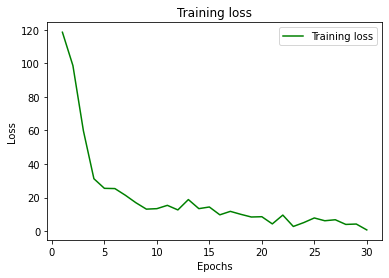

In [57]:
loss_train = loss_log
epochs=range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
if output_dir is not None:
    output_dir = Path(output_dir)
    if not output_dir.exists():
        output_dir.mkdir()
    nlp.to_disk(output_dir)
    print("Saved model to", output_dir)

Saved model to /content/gdrive/MyDrive/Samsung-Prism
